<img src="https://www.pucsp.br/sites/default/files/download/ODS/PUCSP-ODS-brasao_FundoTransparente-textoPreto.png" alt="Logo PUC / ODS" style="width: 25%;">

# Hackathon:
## Como as teses e dissertações da PUC-SP se alinham aos Objetivos de Desenvolvimento Sustentável?

## Grupo

| Nome | RA |
|---|---|
| Ana Clara Rodrigues | RA00333452 |
| Danyel Usero | RA00297824 |
| Felipe Burgos | RA00347813 |
| Gabriel Machado | RA00349689 |
| Luisa Peixoto | RA00346006 |
| Matheus Freitas | RA00346280 |
| Matheus Lobao | RA00346765 |
| Manoela Finotti | RA00319067 |
| Melissa Assis | RA00320501 |
| Simeon Ivanov | RA00297777 |

## Importando Bibliotecas

In [238]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
# from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\manoe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manoe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Dados de Treino

### Baixando Dados de Treino

In [239]:
df = pd.read_csv('train_df.tsv', sep='\t')

In [3]:
df.head()

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo
0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...
1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Faculdade de Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...
2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...
3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...
4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...


### Analisando os Dados

In [4]:
#tamanho do df
df.shape

(6069, 15)

In [5]:
#verificando campos vazios
df.isnull().sum()

data              0
uri               0
idioma            0
editor            0
programa          0
direito_acesso    0
departamento      0
area_cnpq         0
titulo            0
tipo              0
patrocinio        0
keywords          0
abstract          0
palavras_chave    0
resumo            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            6069 non-null   object
 1   uri             6069 non-null   object
 2   idioma          6069 non-null   object
 3   editor          6069 non-null   object
 4   programa        6069 non-null   object
 5   direito_acesso  6069 non-null   object
 6   departamento    6069 non-null   object
 7   area_cnpq       6069 non-null   object
 8   titulo          6069 non-null   object
 9   tipo            6069 non-null   object
 10  patrocinio      6069 non-null   object
 11  keywords        6069 non-null   object
 12  abstract        6069 non-null   object
 13  palavras_chave  6069 non-null   object
 14  resumo          6069 non-null   object
dtypes: object(15)
memory usage: 711.3+ KB


### Pre-Processamento

In [7]:
def preprocessText(msg):
    #removendo pontuação
    removepunc = [c for c in msg if c not in string.punctuation]
    removepunc = "".join(removepunc)
    #caixa baixa
    lower = removepunc.lower()
    #stop_words
    tokenize = nltk.word_tokenize(lower)
    remove_stop = [word for word in tokenize if word not in stopwords.words('portuguese')]
    #removendo números
    remove_digit = [word for word in remove_stop if not word.isdigit()]
    joinagain = " ".join(remove_digit)
    return joinagain

In [8]:
df['palavras_chave_pre'] = df['palavras_chave'].apply(preprocessText)

In [ ]:
df['resumo_pre'] = df['resumo'].apply(preprocessText)

In [10]:
df.to_csv('preprocessado.csv')

In [297]:
df_pre = pd.read_csv('preprocessado.csv')

In [298]:
df_pre.head()

,Unnamed: 0,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre
0,0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...,inovação tecnológica contabilidade contador re...,pesquisa discute impacto transformação digital...
1,1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Faculdade de Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...,liceu pasteur sao paulo sp história lyceu fran...,dissertação investiga lyceu francobrasileiro s...
2,2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...,conjugalidade homossexual companheiros homosse...,estudo objetivo compreender processo revelação...
3,3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...,sociabilidade lazer civilidade modernidade,práticas sociabilidade cultura sociedade apres...
4,4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...,pobres escolarização bahia bahia ba historia e...,pesquisa objeto acompanhar processo tentativas...


In [299]:
df_pre.drop('Unnamed: 0', axis = 1, inplace = True)

In [300]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data                6069 non-null   object
 1   uri                 6069 non-null   object
 2   idioma              6069 non-null   object
 3   editor              6069 non-null   object
 4   programa            6069 non-null   object
 5   direito_acesso      6069 non-null   object
 6   departamento        6069 non-null   object
 7   area_cnpq           6069 non-null   object
 8   titulo              6069 non-null   object
 9   tipo                6069 non-null   object
 10  patrocinio          6069 non-null   object
 11  keywords            6069 non-null   object
 12  abstract            6069 non-null   object
 13  palavras_chave      6069 non-null   object
 14  resumo              6069 non-null   object
 15  palavras_chave_pre  5983 non-null   object
 16  resumo_pre          6062

In [301]:
(df_pre['resumo'] == '0').sum()

7

In [302]:
(df_pre['palavras_chave'] == '0').sum()

86

In [303]:
df_pre.isnull().sum()

data                   0
uri                    0
idioma                 0
editor                 0
programa               0
direito_acesso         0
departamento           0
area_cnpq              0
titulo                 0
tipo                   0
patrocinio             0
keywords               0
abstract               0
palavras_chave         0
resumo                 0
palavras_chave_pre    86
resumo_pre             7
dtype: int64

In [304]:
df_pre['resumo_pre'] = df_pre['resumo_pre'].fillna('0')
df_pre['palavras_chave_pre'] = df_pre['palavras_chave_pre'].fillna('0')

In [305]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data                6069 non-null   object
 1   uri                 6069 non-null   object
 2   idioma              6069 non-null   object
 3   editor              6069 non-null   object
 4   programa            6069 non-null   object
 5   direito_acesso      6069 non-null   object
 6   departamento        6069 non-null   object
 7   area_cnpq           6069 non-null   object
 8   titulo              6069 non-null   object
 9   tipo                6069 non-null   object
 10  patrocinio          6069 non-null   object
 11  keywords            6069 non-null   object
 12  abstract            6069 non-null   object
 13  palavras_chave      6069 non-null   object
 14  resumo              6069 non-null   object
 15  palavras_chave_pre  6069 non-null   object
 16  resumo_pre          6069

In [306]:
df_pre['departamento'].unique()

array(['Faculdade de Ciências Exatas e Tecnologia',
       'Faculdade de Educação', 'Psicologia', 'História',
       'Faculdade de Ciências Humanas e da Saúde', 'Comunicação',
       'Ciências da Religião', 'Educação',
       'Faculdade de Ciências Sociais', 'Lingüística',
       'Faculdade de Filosofia, Comunicação, Letras e Artes',
       'Gerontologia', 'Ciências Sociais', 'Faculdade de Teologia',
       'Serviço Social', 'Ciências Cont. Atuariais', 'Literatura',
       'Economia', 'Língua Portuguesa', 'Teologia', 'Filosofia',
       'Faculdade de Economia, Administração, Contábeis e Atuariais',
       'História da Ciência', 'Fonoaudiologia', 'Faculdade de Direito',
       'Faculdade de Ciências Médicas e da Saúde', 'Mídias Digitais',
       'Relações Internacionais'], dtype=object)

In [309]:
df_pre['departamento'] = df_pre['departamento'].str.replace('Faculdade de Educação', 'Educação')
df_pre['departamento'] = df_pre['departamento'].str.replace('Faculdade de Ciências Sociais', 'Ciências Sociais')
df_pre['departamento'] = df_pre['departamento'].str.replace('Faculdade de Teologia', 'Teologia')

In [310]:
df_pre['departamento'].unique()


array(['Faculdade de Ciências Exatas e Tecnologia', 'Educação',
       'Psicologia', 'História',
       'Faculdade de Ciências Humanas e da Saúde', 'Comunicação',
       'Ciências da Religião', 'Ciências Sociais', 'Lingüística',
       'Faculdade de Filosofia, Comunicação, Letras e Artes',
       'Gerontologia', 'Teologia', 'Serviço Social',
       'Ciências Cont. Atuariais', 'Literatura', 'Economia',
       'Língua Portuguesa', 'Filosofia',
       'Faculdade de Economia, Administração, Contábeis e Atuariais',
       'História da Ciência', 'Fonoaudiologia', 'Faculdade de Direito',
       'Faculdade de Ciências Médicas e da Saúde', 'Mídias Digitais',
       'Relações Internacionais'], dtype=object)

### Nuvem de Palavras

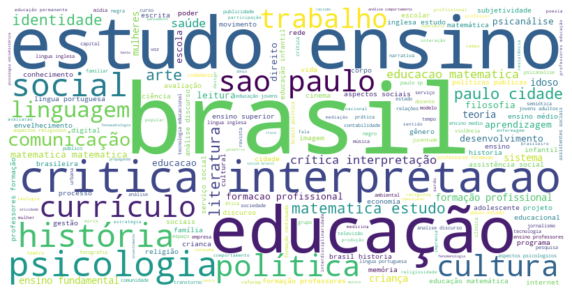

In [311]:
#concatenar as palavras chave em uma única string
all_text = ' '.join(df_pre['palavras_chave_pre'])

#nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#plotar a imagem
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

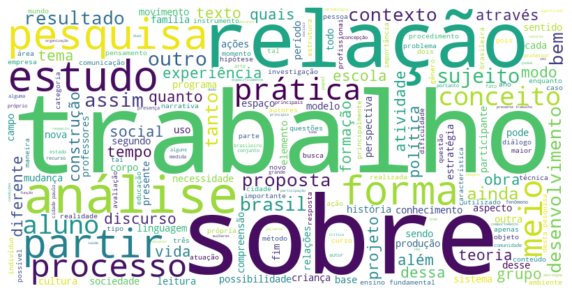

In [312]:
#concatenar os resumos em uma única string
all_text = ' '.join(df_pre['resumo_pre'])

#nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#plotar a imagem
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Análises Gráficas

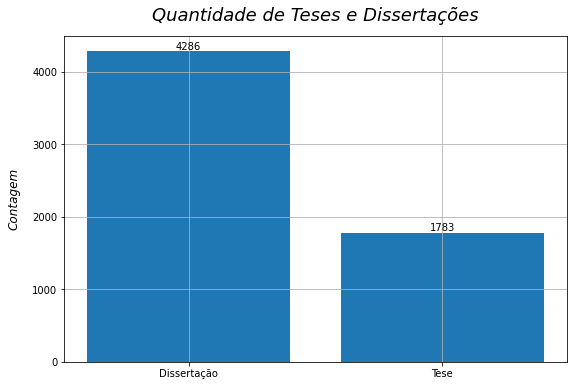

In [313]:
fig = plt.subplots(figsize = (9,6))
tipo = df_pre['tipo'].value_counts()
plt.bar(tipo.index, tipo.values)
for i, count in enumerate(tipo.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Quantidade de Teses e Dissertações', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.ylabel('Contagem', fontsize = 12, style = "italic", labelpad = 12)
plt.grid()

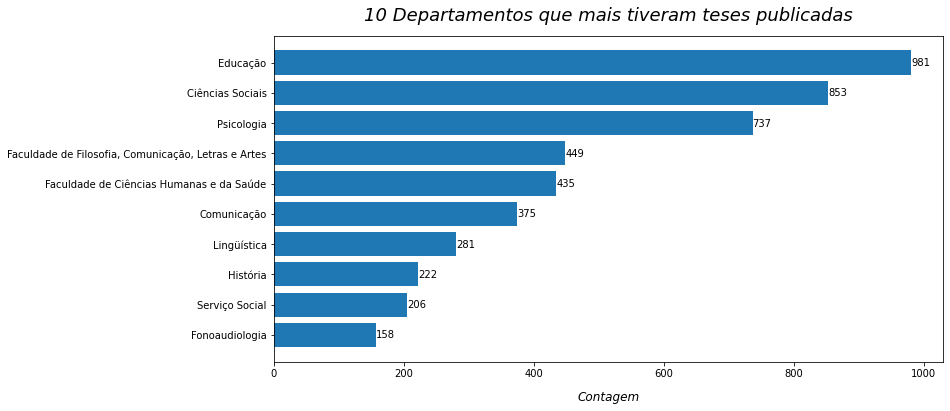

In [314]:
departamento_counts = df_pre['departamento'].value_counts()
top_10_departamentos = departamento_counts.head(10)
top_10_departamentos = top_10_departamentos.sort_values(ascending=True)
fig = plt.subplots(figsize=(12, 6))
plt.barh(top_10_departamentos.index, top_10_departamentos.values) 
for i, count in enumerate(top_10_departamentos.values):
    plt.text(count, i, str(count), va='center', ha='left') 
plt.title('10 Departamentos que mais tiveram teses publicadas', fontsize=18, style="italic", loc="center", pad=15)
plt.xlabel('Contagem', fontsize=12, style="italic", labelpad=12)
plt.show()

## ODS

### Baixando as ODS

In [315]:
ods01 = df_pre.query("resumo_pre.str.contains('extrema pobreza') \
             | resumo_pre.str.contains('erradicação da pobreza')\
             | resumo_pre.str.contains('redução da pobreza')\
             | resumo_pre.str.contains('linha internacional de pobreza')\
             | (resumo_pre.str.contains('ajuda financeira') & resumo_pre.str.contains('pobreza'))\
             | (resumo_pre.str.contains('ajuda financeira') & (resumo_pre.str.contains('pobre') | resumo_pre.str.contains('pobre')))\
             | (resumo_pre.str.contains('ajuda financeira') & resumo_pre.str.contains('divisão norte-sul'))\
             | (resumo_pre.str.contains('desenvolvimento financeiro') & resumo_pre.str.contains('pobreza'))\
             | resumo_pre.str.contains('empoderamento financeiro')\
             | resumo_pre.str.contains('efeito sobre a distribuição')\
             | resumo_pre.str.contains('efeito distributivo')\
             | resumo_pre.str.contains('efeitos sobre a distribuição')\
             | resumo_pre.str.contains('efeitos distributivo')\
             | resumo_pre.str.contains('trabalho infantil')\
             | resumo_pre.str.contains('ajuda ao desenvolvimento')\
             | resumo_pre.str.contains('proteção social')\
             | resumo_pre.str.contains('sistema de proteção social')\
             | (resumo_pre.str.contains('proteção social') & resumo_pre.str.contains('acesso'))\
             | resumo_pre.str.contains('microfinanc\w*')\
             | resumo_pre.str.contains('resiliência dos pobres')\
             | (resumo_pre.str.contains('rede de segurança') & (resumo_pre.str.contains('pobre') | resumo_pre.str.contains('pobres') | resumo_pre.str.contains('vulneráveis') | resumo_pre.str.contains('vulnerável')))\
             | (resumo_pre.str.contains('recurso econômico') & resumo_pre.str.contains('acesso'))\
             | (resumo_pre.str.contains('recursos econômicos') & resumo_pre.str.contains('acesso'))\
             | resumo_pre.str.contains('banco de alimentos')\
             | resumo_pre.str.contains('bancos de alimentos')\
            ")

In [316]:
df_pre['ods01'] = df_pre.index.isin(ods01.index)

In [317]:
ods02 = df_pre.query("resumo_pre.str.contains('direitos de posse da terra') \
             | (resumo_pre.str.contains('pequeno produtor') & (resumo_pre.str.contains('fazenda') \
             | resumo_pre.str.contains('silvicultura') \
             | resumo_pre.str.contains('pastoril') \
             | resumo_pre.str.contains('agricultura') \
             | resumo_pre.str.contains('pesca') \
             | resumo_pre.str.contains('produtor de alimentos') \
             | resumo_pre.str.contains('produtores de alimentos'))) \
             | resumo_pre.str.contains('desnutrição') \
             | (resumo_pre.str.contains('desnutrido') | resumo_pre.str.contains('desnutrida')) \
             | resumo_pre.str.contains('subnutrição') \
             | (resumo_pre.str.contains('subnutrido') | resumo_pre.str.contains('subnutrida')) \
             | resumo_pre.str.contains('produção agrícola') \
             | resumo_pre.str.contains('produtividade agrícola') \
             | resumo_pre.str.contains('práticas agrícolas') \
             | (resumo_pre.str.contains('manejo') | resumo_pre.str.contains('gestão agrícola')) \
             | resumo_pre.str.contains('produção alimentar') \
             | resumo_pre.str.contains('produção de alimentos') \
             | resumo_pre.str.contains('produtividade alimentar') \
             | resumo_pre.str.contains('produtividade de alimentos') \
             | resumo_pre.str.contains('segurança alimentar') \
             | resumo_pre.str.contains('insegurança alimentar') \
             | resumo_pre.str.contains('direito à terra') \
             | resumo_pre.str.contains('direitos à terra') \
             | resumo_pre.str.contains('reforma agrária') \
             | resumo_pre.str.contains('reformas agrárias') \
             | resumo_pre.str.contains('práticas agrícolas resilientes') \
             | (resumo_pre.str.contains('agricultura') & resumo_pre.str.contains('potássio')) \
             | resumo_pre.str.contains('fertilizante') \
             | resumo_pre.str.contains('melhoria da nutrição alimentar') \
             | resumo_pre.str.contains('fome oculta') \
             | resumo_pre.str.contains('alimentos geneticamente modificados') \
             | (resumo_pre.str.contains('transgênicos') & resumo_pre.str.contains('alimentos')) \
             | resumo_pre.str.contains('práticas agroflorestais') \
             | (resumo_pre.str.contains('manejo') | resumo_pre.str.contains('gestão agroflorestal')) \
             | resumo_pre.str.contains('inovação agrícola') \
             | (resumo_pre.str.contains('segurança alimentar') & resumo_pre.str.contains('diversidade genética')) \
             | (resumo_pre.str.contains('mercado de alimentos') & (resumo_pre.str.contains('restrição') \
             | resumo_pre.str.contains('tarifa') \
             | resumo_pre.str.contains('acesso') \
             | resumo_pre.str.contains('divisão norte-sul') \
             | resumo_pre.str.contains('governança do desenvolvimento'))) \
             | resumo_pre.str.contains('governança alimentar') \
             | resumo_pre.str.contains('cadeia de abastecimento alimentar') \
             | resumo_pre.str.contains('cadeia de valor alimentar') \
             | resumo_pre.str.contains('mercado de commodities alimentares') \
             & ~resumo_pre.str.contains('doença')")

In [318]:
df_pre['ods02'] = df_pre.index.isin(ods02.index)

In [319]:
ods03 = df_pre.query("(resumo_pre.str.contains('humano') & (resumo_pre.str.contains('saúde') \
             | resumo_pre.str.contains('doença') \
             | resumo_pre.str.contains('remédio') \
             | resumo_pre.str.contains('mortalidade'))) \
             | resumo_pre.str.contains('síndrome da criança espancada') \
             | resumo_pre.str.contains('doença cardiovascular') \
             | resumo_pre.str.contains('doenças cardiovasculares') \
             | resumo_pre.str.contains('chagas') \
             | resumo_pre.str.contains('abuso infantil') \
             | resumo_pre.str.contains('negligência infantil') \
             | resumo_pre.str.contains('índice de bem-estar infantil') \
             | resumo_pre.str.contains('índice de bem-estar juvenil') \
             | resumo_pre.str.contains('doença transmitida pela água') \
             | resumo_pre.str.contains('doenças transmitidas pela água') \
             | resumo_pre.str.contains('doença tropical') \
             | resumo_pre.str.contains('doenças tropicais') \
             | resumo_pre.str.contains('doença respiratória crônica') \
             | resumo_pre.str.contains('doenças respiratórias crônicas') \
             | resumo_pre.str.contains('doença infecciosa') \
             | resumo_pre.str.contains('doenças infecciosas') \
             | resumo_pre.str.contains('doenças sexualmente transmissíveis') \
             | resumo_pre.str.contains('doença sexualmente transmissível') \
             | resumo_pre.str.contains('doença transmissível') \
             | resumo_pre.str.contains('doenças transmissíveis') \
             | resumo_pre.str.contains('sida') \
             | resumo_pre.str.contains('aids') \
             | resumo_pre.str.contains('hiv') \
             | resumo_pre.str.contains('vírus da imunodeficiência humana') \
             | resumo_pre.str.contains('tuberculose') \
             | resumo_pre.str.contains('malária') \
             | resumo_pre.str.contains('hepatite') \
             | resumo_pre.str.contains('poliomielite') \
             | resumo_pre.str.contains('vacina') \
             | resumo_pre.str.contains('câncer') \
             | resumo_pre.str.contains('diabetes') \
             | resumo_pre.str.contains('mortalidade materna') \
             | resumo_pre.str.contains('mortalidade infantil') \
             | resumo_pre.str.contains('complicações no parto') \
             | resumo_pre.str.contains('mortalidade neonatal') \
             | resumo_pre.str.contains('mortalidade prematura') \
             | resumo_pre.str.contains('ano de vida ajustado pela qualidade') \
             | resumo_pre.str.contains('saúde materna') \
             | resumo_pre.str.contains('morte evitável') \
             | resumo_pre.str.contains('mortes evitáveis') \
             | resumo_pre.str.contains('controle do tabaco') \
             | resumo_pre.str.contains('abuso de substâncias') \
             | resumo_pre.str.contains('abuso de drogas') \
             | resumo_pre.str.contains('uso de tabaco') \
             | resumo_pre.str.contains('uso de álcool') \
             | resumo_pre.str.contains('dependência de substâncias') \
             | resumo_pre.str.contains('dependência química') \
             | resumo_pre.str.contains('dependência de drogas') \
             | resumo_pre.str.contains('tabagismo') \
             | resumo_pre.str.contains('alcoolismo') \
             | resumo_pre.str.contains('suicídio') \
             | resumo_pre.str.contains('depressão pós-parto') \
             | resumo_pre.str.contains('zika vírus') \
             | resumo_pre.str.contains('dengue') \
             | resumo_pre.str.contains('esquistossomose') \
             | resumo_pre.str.contains('doença do sono') \
             | resumo_pre.str.contains('ebola') \
             | resumo_pre.str.contains('saúde mental') \
             | resumo_pre.str.contains('transtorno mental') \
             | resumo_pre.str.contains('doença mental') \
             | resumo_pre.str.contains('doenças mentais') \
             | resumo_pre.str.contains('sarampo') \
             | resumo_pre.str.contains('doença negligenciada') \
             | resumo_pre.str.contains('doenças negligenciadas') \
             | resumo_pre.str.contains('diarreia') \
             | resumo_pre.str.contains('cólera') \
             | resumo_pre.str.contains('disenteria') \
             | resumo_pre.str.contains('febre tifoide') \
             | resumo_pre.str.contains('acidente de trânsito') \
             | resumo_pre.str.contains('estilo de vida saudável') \
             | resumo_pre.str.contains('expectativa de vida') \
             | resumo_pre.str.contains('política de saúde') \
             | (resumo_pre.str.contains('sistema de saúde') & (resumo_pre.str.contains('acesso') | resumo_pre.str.contains('acessível'))) \
             | resumo_pre.str.contains('risco de saúde') \
             | resumo_pre.str.contains('riscos de saúde') \
             | resumo_pre.str.contains('saúde inclusiva') \
             | resumo_pre.str.contains('obesidade') \
             | resumo_pre.str.contains('determinantes sociais de saúde') \
             | resumo_pre.str.contains('dano psicológico') \
             | resumo_pre.str.contains('bem-estar psicológico') \
             | resumo_pre.str.contains('saúde pública')")

In [320]:
df_pre['ods03'] = df_pre.index.isin(ods03.index)

In [321]:
ods04 = df_pre.query("(resumo_pre.str.contains('escola') \
             | resumo_pre.str.contains('educação') \
             | resumo_pre.str.contains('educacional')) \
             & (resumo_pre.str.contains('frequência escolar') \
             | resumo_pre.str.contains('matrícula escolar') \
             | resumo_pre.str.contains('educação inclusiva') \
             | resumo_pre.str.contains('desigualdade educacional') \
             | resumo_pre.str.contains('qualidade educacional') \
             | resumo_pre.str.contains('matrícula educacional') \
             | resumo_pre.str.contains('alfabetização de adultos') \
             | resumo_pre.str.contains('taxa de numeramento') \
             | resumo_pre.str.contains('ambiente educacional') \
             | resumo_pre.str.contains('acesso educacional') \
             | (resumo_pre.str.contains('ajuda ao desenvolvimento') & resumo_pre.str.contains('treinamento de professores')) \
             | resumo_pre.str.contains('educação infantil') \
             | resumo_pre.str.contains('educação básica') \
             | resumo_pre.str.contains('acessível educação') \
             | resumo_pre.str.contains('auxílio financeiro educacional') \
             | resumo_pre.str.contains('segurança escolar') \
             | resumo_pre.str.contains('segurança na escola') \
             | (resumo_pre.str.contains('oportunidades de aprendizado') & (resumo_pre.str.contains('disparidades de gênero') | resumo_pre.str.contains('empoderamento'))) \
             | (resumo_pre.str.contains('oportunidade de aprendizado') & (resumo_pre.str.contains('disparidades de gênero') | resumo_pre.str.contains('empoderamento'))) \
             | resumo_pre.str.contains('empoderamento da juventude') \
             | resumo_pre.str.contains('empoderamento das mulheres') \
             | resumo_pre.str.contains('oportunidades iguais') \
             | resumo_pre.str.contains('trabalho infantil') \
             | resumo_pre.str.contains('discriminatório') \
             | resumo_pre.str.contains('lacuna educacional') \
             | (resumo_pre.str.contains('armadilha da pobreza') & resumo_pre.str.contains('escolaridade')) \
             | resumo_pre.str.contains('necessidades de educação especial') \
             | resumo_pre.str.contains('sistema educacional inclusivo') \
             | (resumo_pre.str.contains('escolarização') & (resumo_pre.str.contains('disparidades de gênero') | resumo_pre.str.contains('disparidades étnicas') | resumo_pre.str.contains('disparidades raciais'))) \
             | resumo_pre.str.contains('exclusão educacional') \
             | resumo_pre.str.contains('abandono escolar') \
             | resumo_pre.str.contains('cidadania global') \
             | resumo_pre.str.contains('educação para o desenvolvimento sustentável') \
             | resumo_pre.str.contains('educação ambiental') \
             | resumo_pre.str.contains('política educacional') \
             | resumo_pre.str.contains('políticas educacionais') \
             | resumo_pre.str.contains('educação internacional') \
             | resumo_pre.str.contains('reforma da educação') \
             | (resumo_pre.str.contains('reforma educacional') & resumo_pre.str.contains('países em desenvolvimento')) \
             | resumo_pre.str.contains('governança educacional') \
             | (resumo_pre.str.contains('países em desenvolvimento') & resumo_pre.str.contains('efeitos escolares')) \
             | resumo_pre.str.contains('despesas com educação') \
             | resumo_pre.str.contains('ajuda externa') \
             | (resumo_pre.str.contains('treinamento de professores') & resumo_pre.str.contains('países em desenvolvimento')) \
             | resumo_pre.str.contains('desgaste de professores') \
             & ~resumo_pre.str.contains('alfabetização em saúde'))")

In [322]:
df_pre['ods04'] = df_pre.index.isin(ods04.index)

In [323]:
ods05 = df_pre.query("(resumo_pre.str.contains('desigualdade de gênero') \
             | resumo_pre.str.contains('igualdade de gênero') \
             | resumo_pre.str.contains('igualdade no emprego') \
             | resumo_pre.str.contains('diferença salarial entre gêneros') \
             | resumo_pre.str.contains('participação feminina na força de trabalho') \
             | resumo_pre.str.contains('participação da mulher na força de trabalho') \
             | resumo_pre.str.contains('participação das mulheres na força de trabalho') \
             | resumo_pre.str.contains('emprego feminino') \
             | resumo_pre.str.contains('desemprego feminino') \
             | (resumo_pre.str.contains('acesso') & resumo_pre.str.contains('serviços de planejamento familiar')) \
             | resumo_pre.str.contains('casamento forçado') \
             | resumo_pre.str.contains('casamento infantil') \
             | resumo_pre.str.contains('casamentos forçados') \
             | resumo_pre.str.contains('casamentos infantis') \
             | resumo_pre.str.contains('segregação ocupacional') \
             | resumo_pre.str.contains('empoderamento de mulheres') \
             | resumo_pre.str.contains('empoderamento de meninas') \
             | resumo_pre.str.contains('empoderamento feminino') \
             | resumo_pre.str.contains('mutilação genital feminina') \
             | resumo_pre.str.contains('corte genital feminino') \
             | resumo_pre.str.contains('violência doméstica') \
             | resumo_pre.str.contains('mulher E violência') \
             | resumo_pre.str.contains('menina\w* E violência') \
             | resumo_pre.str.contains('violência sexual') \
             | (resumo_pre.str.contains('trabalho não remunerado') & resumo_pre.str.contains('desigualdade de gênero')) \
             | (resumo_pre.str.contains('trabalho de cuidado não remunerado') & resumo_pre.str.contains('desigualdade de gênero')) \
             | resumo_pre.str.contains('participação política das mulheres') \
             | resumo_pre.str.contains('participação política feminina') \
             | resumo_pre.str.contains('gestoras femininas') \
             | resumo_pre.str.contains('mulheres na liderança') \
             | resumo_pre.str.contains('liderança feminina') \
             | resumo_pre.str.contains('alocação intrafamiliar') \
             | (resumo_pre.str.contains('acesso') & resumo_pre.str.contains('saúde reprodutiva')) \
             | resumo_pre.str.contains('assassinato de honra') \
             | resumo_pre.str.contains('assassinatos de honra') \
             | resumo_pre.str.contains('antimulheres') \
             | resumo_pre.str.contains('anti-mulheres') \
             | resumo_pre.str.contains('feminismo') \
             | resumo_pre.str.contains('misoginia') \
             | resumo_pre.str.contains('infanticídio feminino') \
             | resumo_pre.str.contains('infanticídios femininos') \
             | resumo_pre.str.contains('tráfico humano') \
             | resumo_pre.str.contains('prostituição forçada') \
             | (resumo_pre.str.contains('igualdade') & (resumo_pre.str.contains('direitos sexuais') | resumo_pre.str.contains('direitos reprodutivos') | resumo_pre.str.contains('direitos do divórcio'))) \
             | resumo_pre.str.contains('direitos das mulheres') \
             | resumo_pre.str.contains('injustiça de gênero') \
             | resumo_pre.str.contains('injustiças de gênero') \
             | resumo_pre.str.contains('discriminação de gênero') \
             | resumo_pre.str.contains('disparidades de gênero') \
             | resumo_pre.str.contains('diferença de gênero') \
             | resumo_pre.str.contains('exploração feminina') \
             | resumo_pre.str.contains('equidade doméstica') \
             | resumo_pre.str.contains('sub-representação das mulheres') \
             | resumo_pre.str.contains('empreendedorismo feminino') \
             | resumo_pre.str.contains('propriedade feminina') \
             | resumo_pre.str.contains('desenvolvimento econômico das mulheres') \
             | resumo_pre.str.contains('poder das mulheres') \
             | resumo_pre.str.contains('orçamento sensível ao gênero') \
             | resumo_pre.str.contains('cota de gênero') \
             | (resumo_pre.str.contains('ajuda externa') & resumo_pre.str.contains('empoderamento das mulheres')) \
             | resumo_pre.str.contains('segregação de gênero') \
             | resumo_pre.str.contains('violência de gênero') \
             | resumo_pre.str.contains('participação de gênero') \
             | resumo_pre.str.contains('mulher na política') \
             | resumo_pre.str.contains('mulheres na política') \
             | resumo_pre.str.contains('liderança feminina') \
             | resumo_pre.str.contains('comportamento contraceptivo') \
             | resumo_pre.str.contains('autonomia das mulheres') \
             | resumo_pre.str.contains('feminismo agrário') \
             | resumo_pre.str.contains('microcrédito') \
             | resumo_pre.str.contains('subsistência das mulheres') \
             | resumo_pre.str.contains('propriedade das mulheres') \
             | resumo_pre.str.contains('pequena proprietária') \
             | resumo_pre.str.contains('transversalização de gênero'))")

In [324]:
df_pre['ods05'] = df_pre.index.isin(ods05.index)

In [325]:
ods06 = df_pre.query("(resumo_pre.str.contains('seguro') & (resumo_pre.str.contains('acesso à água') | resumo_pre.str.contains('água potável'))) \
             | (resumo_pre.str.contains('limpa') & (resumo_pre.str.contains('água potável') | resumo_pre.str.contains('fonte de água'))) \
             | (resumo_pre.str.contains('água') & (resumo_pre.str.contains('saneamento e higiene') \
             | resumo_pre.str.contains('qualidade') \
             | resumo_pre.str.contains('recurso') \
             & (resumo_pre.str.contains('disponibilidade de água') \
             | resumo_pre.str.contains('eficiência do uso da água') \
             | resumo_pre.str.contains('abastecimento de água') \
             | resumo_pre.str.contains('água potável') \
             | resumo_pre.str.contains('banheiro higiênico') \
             | resumo_pre.str.contains('membrana anti-incrustante') \
             | resumo_pre.str.contains('gestão da água') \
             | resumo_pre.str.contains('toxicologia aquática') \
             | resumo_pre.str.contains('ecotoxicologia aquática')))) \
             | (resumo_pre.str.contains('água fresca') & resumo_pre.str.contains('qualidade da água') \
             | (resumo_pre.str.contains('água doce') & resumo_pre.str.contains('qualidade da água') \
             & (resumo_pre.str.contains('poluente') | resumo_pre.str.contains('poluição') | resumo_pre.str.contains('contamina*')))) \
             | (resumo_pre.str.contains('água doce') & (resumo_pre.str.contains('segurança hídrica') \
             | (resumo_pre.str.contains('água fresca') & (resumo_pre.str.contains('segurança hídrica') \
             | resumo_pre.str.contains('escassez de água') \
             | (resumo_pre.str.contains('água residual') & resumo_pre.str.contains('tratamento')) \
             | resumo_pre.str.contains('conservação da água') \
             | resumo_pre.str.contains('pegada hídrica') \
             | resumo_pre.str.contains('infraestrutura hídrica') \
             | resumo_pre.str.contains('poluição da água') \
             | resumo_pre.str.contains('purificação da água') \
             | resumo_pre.str.contains('uso da água') \
             | resumo_pre.str.contains('saneamento*') \
             | resumo_pre.str.contains('esgoto*'))))) \
             | (resumo_pre.str.contains('água') & resumo_pre.str.contains('ecossistema') \
             & (resumo_pre.str.contains('proteção de') | resumo_pre.str.contains('disruptor endócrino') | resumo_pre.str.contains('disruptores endócrinos')) \
             & ~resumo_pre.str.contains('marinhos')) \
             | (resumo_pre.str.contains('água') & resumo_pre.str.contains('gestão da água') \
             & (resumo_pre.str.contains('remediação da poluição') | resumo_pre.str.contains('remoção de poluentes'))) \
             | (resumo_pre.str.contains('água subterrânea') & resumo_pre.str.contains('água doce')) \
             | ((resumo_pre.str.contains('poluição da água') | resumo_pre.str.contains('poluente da água')) \
             & ((resumo_pre.str.contains('água residual') & resumo_pre.str.contains('tratamento')))) \
             | resumo_pre.str.contains('disponibilidade de água doce') \
             | resumo_pre.str.contains('escassez de água') \
             | resumo_pre.str.contains('fecalismo a céu aberto') \
             | resumo_pre.str.contains('água azul') \
             | resumo_pre.str.contains('água verde') \
             | resumo_pre.str.contains('água cinza') \
             | resumo_pre.str.contains('água negra') \
             & ~resumo_pre.str.contains('estudo da carga global de doenças')")

In [326]:
df_pre['ods06'] = df_pre.index.isin(ods06.index)

In [327]:
ods07 = df_pre.query("(resumo_pre.str.contains('eficiência energética') \
             | resumo_pre.str.contains('consumo de energia') \
             | resumo_pre.str.contains('transição energética') \
             | resumo_pre.str.contains('tecnologia de energia limpa') \
             | resumo_pre.str.contains('equidade energética') \
             | resumo_pre.str.contains('justiça energética') \
             | resumo_pre.str.contains('pobreza energética') \
             | resumo_pre.str.contains('política energética') \
             | resumo_pre.str.contains('renovável\w*') \
             | resumo_pre.str.contains('sociedade de 2000 Watts') \
             | resumo_pre.str.contains('micro-rede inteligente') \
             | resumo_pre.str.contains('rede inteligente') \
             | resumo_pre.str.contains('microrrede inteligente') \
             | resumo_pre.str.contains('micro-redes inteligentes') \
             | resumo_pre.str.contains('redes inteligentes') \
             | resumo_pre.str.contains('microrredes inteligentes') \
             | resumo_pre.str.contains('medidor inteligente') \
             | resumo_pre.str.contains('medidores inteligentes') \
             | resumo_pre.str.contains('eletricidade acessível') \
             | resumo_pre.str.contains('consumo de eletricidade') \
             | resumo_pre.str.contains('eletricidade confiável') \
             | resumo_pre.str.contains('combustível limpo') \
             | resumo_pre.str.contains('combustível limpo para cozinhar') \
             | resumo_pre.str.contains('pobreza de combustível') \
             | resumo_pre.str.contains('energiewende') \
             | resumo_pre.str.contains('avaliação do ciclo de vida') \
             | resumo_pre.str.contains('avaliações do ciclo de vida') \
             | (resumo_pre.str.contains('fotoquímica') & resumo_pre.str.contains('energia renovável')) \
             | resumo_pre.str.contains('fotovoltaica') \
             | resumo_pre.str.contains('divisão fotocatalítica da água') \
             | resumo_pre.str.contains('produção de hidrogênio') \
             | resumo_pre.str.contains('divisão da água') \
             | resumo_pre.str.contains('baterias de íon-lítio') \
             | resumo_pre.str.contains('bateria de íon-lítio') \
             | resumo_pre.str.contains('rede de calor') \
             | resumo_pre.str.contains('calor distrital') \
             | resumo_pre.str.contains('aquecimento distrital') \
             | resumo_pre.str.contains('consumo de energia residencial') \
             | resumo_pre.str.contains('consumo de energia doméstica') \
             | resumo_pre.str.contains('segurança energética') \
             | resumo_pre.str.contains('eletrificação rural') \
             | resumo_pre.str.contains('escada de energia') \
             | resumo_pre.str.contains('acesso à energia') \
             | resumo_pre.str.contains('conservação de energia') \
             | resumo_pre.str.contains('sociedade de baixo carbono') \
             | resumo_pre.str.contains('sistema híbrido de energia renovável') \
             | resumo_pre.str.contains('sistemas híbridos de energia renovável') \
             | resumo_pre.str.contains('troca de combustível') \
             | (resumo_pre.str.contains('ajuda externa ao o desenvolvimento') & resumo_pre.str.contains('energia renovável')) \
             | (resumo_pre.str.contains('ajuda externa para o desenvolvimento') & resumo_pre.str.contains('energia renovável')) \
             | resumo_pre.str.contains('governança energética') \
             | (resumo_pre.str.contains('assistência oficial ao desenvolvimento') & resumo_pre.str.contains('eletricidade')) \
             | (resumo_pre.str.contains('desenvolvimento energético') & resumo_pre.str.contains('países em desenvolvimento'))) \
             & ~(resumo_pre.str.contains('rede de sensores sem fio') | resumo_pre.str.contains('redes de sensores sem fio'))")

In [328]:
df_pre['ods07'] = df_pre.index.isin(ods07.index)

In [329]:
ods08 = df_pre.query("(resumo_pre.str.contains('crescimento econômico') \
             | resumo_pre.str.contains('política de desenvolvimento econômico') \
             | resumo_pre.str.contains('política de emprego') \
             | resumo_pre.str.contains('crescimento econômico inclusivo') \
             | resumo_pre.str.contains('crescimento sustentável') \
             | resumo_pre.str.contains('desenvolvimento econômico') \
             | resumo_pre.str.contains('globalização econômica') \
             | resumo_pre.str.contains('produtividade econômica') \
             | resumo_pre.str.contains('economia de baixo carbono') \
             | resumo_pre.str.contains('crescimento inclusivo') \
             | resumo_pre.str.contains('microcrédito\w*') \
             | resumo_pre.str.contains('renda igual') \
             | resumo_pre.str.contains('salários iguais') \
             | resumo_pre.str.contains('emprego decente') \
             | resumo_pre.str.contains('empregos decentes') \
             | resumo_pre.str.contains('emprego de qualidade') \
             | resumo_pre.str.contains('empregos de qualidade') \
             | resumo_pre.str.contains('criação de emprego') \
             | resumo_pre.str.contains('pleno emprego') \
             | resumo_pre.str.contains('proteção do emprego') \
             | resumo_pre.str.contains('emprego informal') \
             | resumo_pre.str.contains('emprego precário') \
             | resumo_pre.str.contains('desemprego') \
             | resumo_pre.str.contains('trabalho precário') \
             | resumo_pre.str.contains('trabalhos precários') \
             | resumo_pre.str.contains('microempresa*') \
             | resumo_pre.str.contains('pequena empresa') \
             | resumo_pre.str.contains('média empresa') \
             | resumo_pre.str.contains('pequenas empresas') \
             | resumo_pre.str.contains('médias empresas') \
             | resumo_pre.str.contains('pequeno empresário') \
             | resumo_pre.str.contains('pequenos empresários') \
             | resumo_pre.str.contains('empresários iniciantes') \
             | resumo_pre.str.contains('empresário iniciante') \
             | resumo_pre.str.contains('médio empresário') \
             | resumo_pre.str.contains('médios empresários') \
             | resumo_pre.str.contains('pequenos empreendedores') \
             | resumo_pre.str.contains('pequeno empreendedor') \
             | resumo_pre.str.contains('médio empreendedor') \
             | resumo_pre.str.contains('médios empreendedores') \
             | resumo_pre.str.contains('empreendedor iniciante') \
             | resumo_pre.str.contains('empreendedores iniciantes') \
             | resumo_pre.str.contains('empreendedorismo social') \
             | resumo_pre.str.contains('ambiente de trabalho seguro') \
             | resumo_pre.str.contains('instituição do mercado de trabalho') \
             | resumo_pre.str.contains('instituições do mercado de trabalho') \
             | resumo_pre.str.contains('trabalho forçado') \
             | resumo_pre.str.contains('trabalho infantil') \
             | resumo_pre.str.contains('direito trabalhista') \
             | resumo_pre.str.contains('direitos trabalhistas') \
             | resumo_pre.str.contains('escravidão moderna') \
             | resumo_pre.str.contains('tráfico de pessoas') \
             | resumo_pre.str.contains('criança-soldado') \
             | resumo_pre.str.contains('crianças-soldado') \
             | resumo_pre.str.contains('empregos globais') \
             | resumo_pre.str.contains('salário mínimo') \
             | resumo_pre.str.contains('economia circular') \
             | resumo_pre.str.contains('economia inclusiva') \
             | resumo_pre.str.contains('economia rural') \
             | resumo_pre.str.contains('Investimento de Desenvolvimento Estrangeiro') \
             | resumo_pre.str.contains('Ajuda ao Comércio') \
             | resumo_pre.str.contains('sindicatos') \
             | resumo_pre.str.contains('sindicato') \
             | resumo_pre.str.contains('trabalhadores pobres') \
             | resumo_pre.str.contains('Não está em educação, emprego ou treinamento') \
             | resumo_pre.str.contains('compensação de carbono') \
             | resumo_pre.str.contains('compensações de carbono') \
             | resumo_pre.str.contains('projeto de compensação') \
             | resumo_pre.str.contains('projetos de compensação') \
             | resumo_pre.str.contains('diversificação econômica') \
             | resumo_pre.str.contains('pegada material') \
             | resumo_pre.str.contains('eficiência de recursos') \
             | (resumo_pre.str.contains('berço ao berço') & resumo_pre.str.contains('economia')) \
             | resumo_pre.str.contains('dissociação econômica') \
             | resumo_pre.str.contains('disparidades do mercado de trabalho') \
             | resumo_pre.str.contains('turismo sustentável') \
             | resumo_pre.str.contains('ecoturismo') \
             | resumo_pre.str.contains('turismo baseado na comunidade') \
             | resumo_pre.str.contains('emprego no turismo') \
             | resumo_pre.str.contains('política de turismo sustentável') \
             | resumo_pre.str.contains('acesso financeiro') \
             | resumo_pre.str.contains('inclusão financeira') \
             | resumo_pre.str.contains('acesso a serviços bancários')) \
             & ~(resumo_pre.str.contains('saúde'))")

In [330]:
df_pre['ods08'] = df_pre.index.isin(ods08.index)

In [331]:
ods09 = df_pre.query("(resumo_pre.str.contains('crescimento industrial') \
             | resumo_pre.str.contains('diversificação industrial') \
             | resumo_pre.str.contains('desenvolvimento de infraestrutura') \
             | resumo_pre.str.contains('investimento em infraestrutura') \
             | resumo_pre.str.contains('infraestrutura pública') \
             | resumo_pre.str.contains('infraestrutura resiliente') \
             | resumo_pre.str.contains('infraestrutura transfronteiriça') \
             | resumo_pre.str.contains('infraestruturas públicas') \
             | resumo_pre.str.contains('infraestruturas resilientes') \
             | resumo_pre.str.contains('infraestruturas transfronteiriças') \
             | (resumo_pre.str.contains('emissões industriais') & resumo_pre.str.contains('mitigação')) \
             | resumo_pre.str.contains('gestão de resíduos industriais') \
             | resumo_pre.str.contains('tratamento de resíduos industriais') \
             | resumo_pre.str.contains('congestionamento de tráfego') \
             | resumo_pre.str.contains('microempresa\w*') \
             | resumo_pre.str.contains('pequena empresa') \
             | resumo_pre.str.contains('média empresa') \
             | resumo_pre.str.contains('pequenas empresas') \
             | resumo_pre.str.contains('médias empresas') \
             | resumo_pre.str.contains('pequeno empresário') \
             | resumo_pre.str.contains('pequenos empresários') \
             | resumo_pre.str.contains('médio empresário') \
             | resumo_pre.str.contains('médios empresários') \
             | resumo_pre.str.contains('pequeno empreendedor') \
             | resumo_pre.str.contains('pequenos empreendedores') \
             | resumo_pre.str.contains('médio empreendedor') \
             | resumo_pre.str.contains('médios empreendedores') \
             | resumo_pre.str.contains('gestão da cadeia de valor') \
             | (resumo_pre.str.contains('acesso à banda larga') & resumo_pre.str.contains('países em desenvolvimento')) \
             | resumo_pre.str.contains('inovação em manufatura') \
             | resumo_pre.str.contains('investimento em manufatura') \
             | resumo_pre.str.contains('transporte sustentável') \
             | resumo_pre.str.contains('transporte acessível') \
             | resumo_pre.str.contains('serviços de transporte') \
             | resumo_pre.str.contains('transporte inclusivo') \
             | resumo_pre.str.contains('investimento em P&D') \
             | resumo_pre.str.contains('produto verde') \
             | resumo_pre.str.contains('produtos verdes') \
             | resumo_pre.str.contains('manufatura sustentável') \
             | (resumo_pre.str.contains('berço ao berço') & resumo_pre.str.contains('indústria')) \
             | resumo_pre.str.contains('cadeia de suprimentos de circuito fechado') \
             | (resumo_pre.str.contains('inovação') & resumo_pre.str.contains('industrial')) \
             | resumo_pre.str.contains('inovação de processo') \
             | resumo_pre.str.contains('inovação de produto') \
             | resumo_pre.str.contains('inovação inclusiva'))")

In [332]:
df_pre['ods09'] = df_pre.index.isin(ods09.index)

In [333]:
ods10 = df_pre.query("(resumo_pre.str.contains('igualdade econômica') \
             | resumo_pre.str.contains('igualdade financeira') \
             | resumo_pre.str.contains('igualdade socioeconômica') \
             | resumo_pre.str.contains('desigualdade econômica') \
             | resumo_pre.str.contains('desigualdade financeira') \
             | resumo_pre.str.contains('desigualdade socioeconômica') \
             | resumo_pre.str.contains('política de reforma econômica') \
             | resumo_pre.str.contains('políticas de reforma econômica') \
             | resumo_pre.str.contains('inclusão política') \
             | resumo_pre.str.contains('política de proteção social') \
             | resumo_pre.str.contains('políticas de proteção social') \
             | (resumo_pre.str.contains('imigração') & ~resumo_pre.str.contains('química') & ~resumo_pre.str.contains('doença') & ~resumo_pre.str.contains('biodiversidade')) \
             | (resumo_pre.str.contains('emigração') & ~resumo_pre.str.contains('química') & ~resumo_pre.str.contains('doença') & ~resumo_pre.str.contains('biodiversidade')) \
             | resumo_pre.str.contains('investimento estrangeiro direto') \
             | resumo_pre.str.contains('lacuna de desenvolvimento') \
             | resumo_pre.str.contains('lacunas de desenvolvimento') \
             | resumo_pre.str.contains('remessa de migrantes') \
             | resumo_pre.str.contains('migração responsável') \
             | resumo_pre.str.contains('política de migração') \
             | resumo_pre.str.contains('política migratória') \
             | resumo_pre.str.contains('políticas de migração') \
             | resumo_pre.str.contains('políticas migratórias') \
             | resumo_pre.str.contains('divisão norte-sul') \
             | (resumo_pre.str.contains('desenvolvimento') & (resumo_pre.str.contains('tarifas') | resumo_pre.str.contains('tarifa') | resumo_pre.str.contains('tarifa zero') | resumo_pre.str.contains('acesso isento de impostos'))) \
             | resumo_pre.str.contains('exclusão social') \
             | resumo_pre.str.contains('marginalização econômica') \
             | resumo_pre.str.contains('desigualdade de renda') \
             | resumo_pre.str.contains('lei discriminatória*') \
             | resumo_pre.str.contains('políticas discriminatórias') \
             | resumo_pre.str.contains('política discriminatória') \
             | resumo_pre.str.contains('empoderamento econômico') \
             | resumo_pre.str.contains('transformação econômica') \
             | (resumo_pre.str.contains('mercado global') & resumo_pre.str.contains('empoderamento')))")

In [334]:
df_pre['ods10'] = df_pre.index.isin(ods10.index)

In [335]:
ods11 = df_pre.query("(resumo_pre.str.contains('cidade') \
             | resumo_pre.str.contains('cidades') \
             | resumo_pre.str.contains('assentamento humano') \
             | resumo_pre.str.contains('assentamentos humanos') \
             | resumo_pre.str.contains('urbano') \
             | resumo_pre.str.contains('metrópol\w*') \
             | resumo_pre.str.contains('vila\w*') \
             | resumo_pre.str.contains('municipal\w*')) \
             & \
             (resumo_pre.str.contains('gentrificação') \
             | resumo_pre.str.contains('congestionamento') \
             | resumo_pre.str.contains('transporte') \
             | resumo_pre.str.contains('transporte público') \
             | resumo_pre.str.contains('moradia') \
             | resumo_pre.str.contains('favela\w*') \
             | resumo_pre.str.contains('sendai framework') \
             | resumo_pre.str.contains('Redução de risco de desastres') \
             | resumo_pre.str.contains('RRD') \
             | resumo_pre.str.contains('cidade inteligente') \
             | resumo_pre.str.contains('cidades inteligentes') \
             | resumo_pre.str.contains('edifício resiliente') \
             | resumo_pre.str.contains('edifícios resilientes') \
             | resumo_pre.str.contains('edifício sustentável') \
             | resumo_pre.str.contains('edifícios sustentáveis') \
             | resumo_pre.str.contains('design de edifícios') \
             | resumo_pre.str.contains('projeto de edifícios') \
             | resumo_pre.str.contains('urbanização') \
             | resumo_pre.str.contains('edifício de energia zero') \
             | resumo_pre.str.contains('edifícios de energia zero') \
             | resumo_pre.str.contains('serviço básico') \
             | resumo_pre.str.contains('serviços básicos') \
             | resumo_pre.str.contains('governança') \
             | resumo_pre.str.contains('participação cidadã') \
             | resumo_pre.str.contains('planejamento colaborativo') \
             | resumo_pre.str.contains('planejamento participativo') \
             | resumo_pre.str.contains('inclusão') \
             | resumo_pre.str.contains('patrimônio cultural') \
             | resumo_pre.str.contains('patrimônio natural') \
             | resumo_pre.str.contains('UNESCO') \
             | resumo_pre.str.contains('desastre') \
             | resumo_pre.str.contains('pegada ecológica') \
             | resumo_pre.str.contains('pegada ambiental') \
             | resumo_pre.str.contains('resíduos') \
             | resumo_pre.str.contains('poluição') \
             | resumo_pre.str.contains('poluente\w*') \
             | resumo_pre.str.contains('água residual') \
             | resumo_pre.str.contains('reciclagem') \
             | resumo_pre.str.contains('economia circular') \
             | resumo_pre.str.contains('qualidade do ar') \
             | resumo_pre.str.contains('espaço verde') \
             | resumo_pre.str.contains('espaços verdes') \
             | resumo_pre.str.contains('que inclui a natureza') \
             | resumo_pre.str.contains('edifício/prédio que inclui a natureza') \
             | resumo_pre.str.contains('edifícios/prédios inclusivos da natureza'))")

In [336]:
df_pre['ods11'] = df_pre.index.isin(ods11.index)

In [337]:
ods12 = df_pre.query("resumo_pre.str.contains('poluição ambiental') \
             | resumo_pre.str.contains('resíduos perigosos') \
             | resumo_pre.str.contains('produto químico perigoso') \
             | resumo_pre.str.contains('produtos químicos perigosos') \
             | resumo_pre.str.contains('produto químico tóxico') \
             | resumo_pre.str.contains('produtos químicos tóxicos') \
             | resumo_pre.str.contains('poluição química') \
             | resumo_pre.str.contains('destruição do ozônio') \
             | resumo_pre.str.contains('poluição por pesticidas') \
             | resumo_pre.str.contains('estresse de pesticidas') \
             | resumo_pre.str.contains('redução de pesticidas') \
             | resumo_pre.str.contains('avaliação do ciclo de vida') \
             | resumo_pre.str.contains('análise do ciclo de vida') \
             | resumo_pre.str.contains('análises do ciclo de vida') \
             | resumo_pre.str.contains('economia de baixo carbono') \
             | resumo_pre.str.contains('pegada ambiental') \
             | resumo_pre.str.contains('pegada material') \
             | resumo_pre.str.contains('eficiência da colheita') \
             | resumo_pre.str.contains('resíduos sólidos') \
             | resumo_pre.str.contains('geração de resíduos') \
             | resumo_pre.str.contains('responsabilidade social corporativa') \
             | resumo_pre.str.contains('sustentabilidade corporativa') \
             | resumo_pre.str.contains('comportamento do consumidor') \
             | resumo_pre.str.contains('comportamentos do consumidor') \
             | resumo_pre.str.contains('reciclagem de resíduos') \
             | resumo_pre.str.contains('reciclagem de recursos') \
             | resumo_pre.str.contains('reutilização de recursos') \
             | resumo_pre.str.contains('reuso de recursos') \
             | resumo_pre.str.contains('economia de base biológica') \
             | resumo_pre.str.contains('resíduo zero') \
             | resumo_pre.str.contains('rótulo de sustentabilidade') \
             | resumo_pre.str.contains('extração de recurso global') \
             | resumo_pre.str.contains('contabilidade do fluxo de materiais') \
             | resumo_pre.str.contains('metabolismo social') \
             | resumo_pre.str.contains('derramamento de alimentos') \
             | resumo_pre.str.contains('derramamento de recursos') \
             | resumo_pre.str.contains('eficiência de recursos') \
             | resumo_pre.str.contains('consumo sustentável de alimentos') \
             | resumo_pre.str.contains('consumo verde') \
             | resumo_pre.str.contains('cadeia de suprimentos sustentável') \
             | resumo_pre.str.contains('economia circular') \
             | resumo_pre.str.contains('do berço ao berço') \
             | resumo_pre.str.contains('compras sustentáveis') \
             | resumo_pre.str.contains('aquisições sustentáveis') \
             | resumo_pre.str.contains('turismo sustentável') \
             | resumo_pre.str.contains('subsídios a combustíveis fósseis') \
             | resumo_pre.str.contains('gastos com combustíveis fósseis') \
             | (resumo_pre.str.contains('consumo') & (resumo_pre.str.contains('uso de recursos') | resumo_pre.str.contains('derramamento'))) \
             | (resumo_pre.str.contains('produção') & (resumo_pre.str.contains('uso de recursos') | resumo_pre.str.contains('derramamento'))) \
             & ~resumo_pre.str.contains('rede de sensores sem fio|redes de sensores sem fio|rede sem fio|redes sem fio|sem fio|doença|astrofísica')")

In [338]:
df_pre['ods12'] = df_pre.index.isin(ods12.index)

In [339]:
ods13 = df_pre.query("resumo_pre.str.contains('ação climática') \
             | resumo_pre.str.contains('adaptação climática') \
             | resumo_pre.str.contains('mudança climática') \
             | resumo_pre.str.contains('capitalismo climático') \
             | resumo_pre.str.contains('ipcc') \
             | resumo_pre.str.contains('efeito climático') \
             | resumo_pre.str.contains('equidade climática') \
             | resumo_pre.str.contains('feedback climático') \
             | resumo_pre.str.contains('finanças climáticas') \
             | resumo_pre.str.contains('financiamento da mudança climática') \
             | resumo_pre.str.contains('imposição do clima') \
             | resumo_pre.str.contains('governança climática') \
             | resumo_pre.str.contains('impacto climático') \
             | resumo_pre.str.contains('investimento climático') \
             | resumo_pre.str.contains('justiça climática') \
             | resumo_pre.str.contains('mitigação climática') \
             | resumo_pre.str.contains('modelo climático') \
             | resumo_pre.str.contains('modelos climáticos') \
             | resumo_pre.str.contains('modelagem climática') \
             | resumo_pre.str.contains('política climática') \
             | resumo_pre.str.contains('políticas climáticas') \
             | resumo_pre.str.contains('risco climático') \
             | resumo_pre.str.contains('riscos climáticos') \
             | resumo_pre.str.contains('serviços climáticos') \
             | resumo_pre.str.contains('serviço climático') \
             | resumo_pre.str.contains('previsão climática') \
             | resumo_pre.str.contains('previsões climáticas') \
             | resumo_pre.str.contains('sinal climático') \
             | resumo_pre.str.contains('sinais climáticos') \
             | resumo_pre.str.contains('ponto de inflexão climática') \
             | resumo_pre.str.contains('variação climática') \
             | resumo_pre.str.contains('variações climáticas') \
             | resumo_pre.str.contains('ecoclimatologia') \
             | resumo_pre.str.contains('Fundo Verde do Clima') \
             | resumo_pre.str.contains('Fundo Verde para o Clima') \
             | resumo_pre.str.contains('clima regional') \
             | resumo_pre.str.contains('climas regionais') \
             | resumo_pre.str.contains('clima urbano') \
             | resumo_pre.str.contains('climas urbanos') \
             | (resumo_pre.str.contains('clima') & \
                (resumo_pre.str.contains('gestão adaptativa') \
                | resumo_pre.str.contains('conscientização') \
                | resumo_pre.str.contains('bioeconomia') \
                | resumo_pre.str.contains('carbono') \
                | resumo_pre.str.contains('tomada de decisão') \
                | resumo_pre.str.contains('redução do risco de desastres') \
                | resumo_pre.str.contains('educação ambiental') \
                | resumo_pre.str.contains('educação para o desenvolvimento sustentável') \
                | resumo_pre.str.contains('conservação de energia/energética') \
                | resumo_pre.str.contains('emissão\w*') \
                | resumo_pre.str.contains('extremo') \
                | resumo_pre.str.contains('cadeia alimentar') \
                | resumo_pre.str.contains('estrutura') \
                | resumo_pre.str.contains('perigo\w*') \
                | resumo_pre.str.contains('ilha\w*') \
                | resumo_pre.str.contains('uso da terra') \
                | resumo_pre.str.contains('megacidade*') \
                | resumo_pre.str.contains('consumo') \
                | resumo_pre.str.contains('produção') \
                | resumo_pre.str.contains('pequenas ilhas em desenvolvimento') \
                | resumo_pre.str.contains('antropoceno') \
                | resumo_pre.str.contains('atmosfera*') \
                | resumo_pre.str.contains('mecanismo de desenvolvimento limpo') \
                | resumo_pre.str.contains('recuo das geleiras') \
                | resumo_pre.str.contains('aquecimento') \
                | resumo_pre.str.contains('estufa') \
                | resumo_pre.str.contains('interação gelo-oceano') \
                | resumo_pre.str.contains('ciclo do nitrogênio') \
                | resumo_pre.str.contains('acidificação dos oceanos') \
                | resumo_pre.str.contains('forçante radiativa') \
                | resumo_pre.str.contains('gelo marinho') \
                | resumo_pre.str.contains('nível do mar') \
                | resumo_pre.str.contains('expansão térmica') \
                | resumo_pre.str.contains('unfccc') \
                | resumo_pre.str.contains('ozônio'))) \
             & ~resumo_pre.str.contains('droga|geomorfologia')")

In [340]:
df_pre['ods13'] = df_pre.index.isin(ods13.index)

In [341]:
ods14 = df_pre.query("(resumo_pre.str.contains('marinho') \
             | resumo_pre.str.contains('oceano') \
             | resumo_pre.str.contains('oceanos') \
             | resumo_pre.str.contains('mar') \
             | resumo_pre.str.contains('mares') \
             | resumo_pre.str.contains('costa*') \
             | resumo_pre.str.contains('mangue')) \
             & (resumo_pre.str.contains('ciclo da água') \
             | resumo_pre.str.contains('ciclos da água') \
             | resumo_pre.str.contains('ciclo biogeoquímico') \
             | resumo_pre.str.contains('ciclos biogeoquímicos') \
             | resumo_pre.str.contains('modelo de circulação oceânica') \
             | resumo_pre.str.contains('modelos de circulação oceânica') \
             | resumo_pre.str.contains('modelagem de circulação oceânica') \
             | resumo_pre.str.contains('iceocean') \
             | resumo_pre.str.contains('oceano gelado') \
             | resumo_pre.str.contains('eutrófica\w*') \
             | resumo_pre.str.contains('marinha') \
             | resumo_pre.str.contains('branqueamento de corais') \
             | resumo_pre.str.contains('manejo costeiro') \
             | resumo_pre.str.contains('gestão costeira') \
             | resumo_pre.str.contains('habitat costeiro') \
             | resumo_pre.str.contains('habitats costeiros') \
             | resumo_pre.str.contains('lixo marinho') \
             | resumo_pre.str.contains('acidificação dos oceanos') \
             | (resumo_pre.str.contains('acidificação') & resumo_pre.str.contains('água do mar')) \
             | resumo_pre.str.contains('pesca') \
             | resumo_pre.str.contains('pesca excessiva') \
             | resumo_pre.str.contains('rendimento sustentável') \
             | resumo_pre.str.contains('área marinha protegida') \
             | resumo_pre.str.contains('áreas marinhas protegidas') \
             | resumo_pre.str.contains('conservação marinha') \
             | resumo_pre.str.contains('ecoturismo') \
             | resumo_pre.str.contains('conservação baseada na comunidade') \
             | resumo_pre.str.contains('deslizamento de terra marinha') \
             | resumo_pre.str.contains('poluição marinha') \
             | resumo_pre.str.contains('escoamento de nutrientes') \
             | resumo_pre.str.contains('ecoturismo costeiro') \
             | resumo_pre.str.contains('pesca destrutiva') \
             | resumo_pre.str.contains('pesca local') \
             | resumo_pre.str.contains('pescadores artesanais') \
             | resumo_pre.str.contains('direitos de pesca') \
             | resumo_pre.str.contains('riqueza de espécies') \
             | resumo_pre.str.contains('conhecimento ecológico tradicional') \
             | resumo_pre.str.contains('pequenas ilhas em desenvolvimento') \
             | resumo_pre.str.contains('cota marinha') \
             | resumo_pre.str.contains('economia marinha') \
             | resumo_pre.str.contains('política marinha')) \
             & ~resumo_pre.str.contains('paleoclima|paleoceanografia|radiocarbono|genética|medicina|droga|engenharia|aerossol')")

In [342]:
df_pre['ods14'] = df_pre.index.isin(ods14.index)

In [343]:
ods15 = df_pre.query("(resumo_pre.str.contains('terrestre') \
             | resumo_pre.str.contains('terra') \
             | resumo_pre.str.contains('água doce')) \
             & (resumo_pre.str.contains('biodivers\w*') \
             | resumo_pre.str.contains('riqueza de espécies') \
             | resumo_pre.str.contains('bioeconom\w*') \
             | resumo_pre.str.contains('produção biológica') \
             | resumo_pre.str.contains('desflorestamento\w*') \
             | resumo_pre.str.contains('desertif\w*') \
             | resumo_pre.str.contains('sistema terrestre') \
             | resumo_pre.str.contains('resiliência ecológica') \
             | resumo_pre.str.contains('ecossistema\w*') \
             | resumo_pre.str.contains('cascata trófica') \
             | resumo_pre.str.contains('nível trófico') \
             | resumo_pre.str.contains('teia trófica') \
             | resumo_pre.str.contains('espécie ameaçada') \
             | resumo_pre.str.contains('espécies ameaçadas') \
             | resumo_pre.str.contains('risco de extinção') \
             | resumo_pre.str.contains('riscos de extinção') \
             | resumo_pre.str.contains('caça furtiva') \
             | resumo_pre.str.contains('caça ilegal\w*') \
             | resumo_pre.str.contains('produto de vida selvagem') \
             | resumo_pre.str.contains('produtos da vida selvagem') \
             | resumo_pre.str.contains('tráfico de animais selvagens') \
             | resumo_pre.str.contains('mercado de animais selvagens') \
             | resumo_pre.str.contains('mercados de animais selvagens') \
             | resumo_pre.str.contains('espécies invasoras') \
             | resumo_pre.str.contains('espécies exóticas') \
             | resumo_pre.str.contains('usos da terra') \
             | resumo_pre.str.contains('uso da terra') \
             | resumo_pre.str.contains('degradação do solo') \
             | resumo_pre.str.contains('degradação da terra') \
             | resumo_pre.str.contains('LULUCF') \
             | resumo_pre.str.contains('\w*floresta\w*') \
             | resumo_pre.str.contains('conservação do solo') \
             | resumo_pre.str.contains('zona úmida\w*') \
             | resumo_pre.str.contains('montanha\w*') \
             | resumo_pre.str.contains('terra seca\w*') \
             | resumo_pre.str.contains('cobertura montanhosa') \
             | resumo_pre.str.contains('área protegida') \
             | resumo_pre.str.contains('áreas protegidas') \
             | resumo_pre.str.contains('REDD') \
             | resumo_pre.str.contains('manejo florestal') \
             | resumo_pre.str.contains('silvicultura') \
             | resumo_pre.str.contains('colheita de madeira') \
             | resumo_pre.str.contains('extração ilegal de madeira') \
             | resumo_pre.str.contains('corte e queima') \
             | resumo_pre.str.contains('cultivo de pousio') \
             | resumo_pre.str.contains('cobertura de árvores') \
             | resumo_pre.str.contains('restauração do solo') \
             | resumo_pre.str.contains('restauração da terra') \
             | resumo_pre.str.contains('seca') \
             | resumo_pre.str.contains('manejo sustentável da terra') \
             | resumo_pre.str.contains('vegetação de montanha') \
             | resumo_pre.str.contains('restauração de habitat') \
             | resumo_pre.str.contains('espécies da Lista Vermelha') \
             | resumo_pre.str.contains('Índice da Lista Vermelha') \
             | resumo_pre.str.contains('onda de extinção') \
             | resumo_pre.str.contains('fragmentação de habitat') \
             | resumo_pre.str.contains('perda de habitat') \
             | resumo_pre.str.contains('Protocolo de Nagoya sobre Acesso a Recursos Genéticos') \
             | resumo_pre.str.contains('recursos genéticos') \
             | resumo_pre.str.contains('invasão biológica') \
             | resumo_pre.str.contains('biodiversidade inclusiva') \
             | resumo_pre.str.contains('conselho de manejo florestal') \
             | resumo_pre.str.contains('aliança para florestas tropicais') \
             | resumo_pre.str.contains('certificação florestal') \
             | resumo_pre.str.contains('auditoria florestal') \
             | resumo_pre.str.contains('ecoturismo') \
             | resumo_pre.str.contains('conservação baseada na comunidade') \
             | resumo_pre.str.contains('conflito entre humanos e animais selvagens'))")

In [344]:
df_pre['ods15'] = df_pre.index.isin(ods15.index)

In [345]:
ods16 = df_pre.query("(resumo_pre.str.contains('inocência presumida') \
             | resumo_pre.str.contains('falsa confissão') \
             | resumo_pre.str.contains('conflito armado') \
             | resumo_pre.str.contains('conflitos armados') \
             | resumo_pre.str.contains('conflito civil') \
             | resumo_pre.str.contains('conflitos civis') \
             | (resumo_pre.str.contains('guerra') & (resumo_pre.str.contains('conflito') \
             | resumo_pre.str.contains('guerra') \
             | resumo_pre.str.contains('democracia') \
             | resumo_pre.str.contains('Convenção de Genebra') \
             | resumo_pre.str.contains('tratado') \
             | resumo_pre.str.contains('paz'))) \
             | resumo_pre.str.contains('manutenção da paz') \
             | (resumo_pre.str.contains('corrupção') & (resumo_pre.str.contains('instituição') \
             | resumo_pre.str.contains('funcionário público') \
             | resumo_pre.str.contains('governo') \
             | resumo_pre.str.contains('suborno') \
             | resumo_pre.str.contains('conflito'))) \
             | resumo_pre.str.contains('crime') \
             | resumo_pre.str.contains('crimes') \
             | resumo_pre.str.contains('criminoso') \
             | resumo_pre.str.contains('déficit democrático') \
             | (resumo_pre.str.contains('democratização') & (resumo_pre.str.contains('institucional') \
             | resumo_pre.str.contains('conflito') \
             | resumo_pre.str.contains('tomada de decisão') \
             | resumo_pre.str.contains('sociedade') \
             | resumo_pre.str.contains('política') \
             | resumo_pre.str.contains('ajuda financeira'))) \
             | resumo_pre.str.contains('conflito étnico') \
             | resumo_pre.str.contains('conflitos étnicos') \
             | resumo_pre.str.contains('exoneração') \
             | resumo_pre.str.contains('genocídio\w*') \
             | resumo_pre.str.contains('homicídio\w*') \
             | resumo_pre.str.contains('assassinato\w*') \
             | resumo_pre.str.contains('tráfico humano') \
             | resumo_pre.str.contains('sistema de justiça criminal') \
             | resumo_pre.str.contains('sistema de justiça') \
             | resumo_pre.str.contains('justiça arbitrária') \
             | resumo_pre.str.contains('refugiado\w*') \
             | resumo_pre.str.contains('terrorista\w*') \
             | resumo_pre.str.contains('violência') \
             | resumo_pre.str.contains('tortura') \
             | resumo_pre.str.contains('estado de direito efetivo') \
             | resumo_pre.str.contains('fluxo de armas') \
             | resumo_pre.str.contains('instituição transparente') \
             | resumo_pre.str.contains('instituições transparentes') \
             | resumo_pre.str.contains('boa governança') \
             | resumo_pre.str.contains('identidade legal para todos') \
             | resumo_pre.str.contains('liberdade de informação') \
             | resumo_pre.str.contains('instituição de direitos humanos') \
             | resumo_pre.str.contains('ativistas de direitos humanos') \
             | resumo_pre.str.contains('liberdade fundamental') \
             | resumo_pre.str.contains('liberdades fundamentais') \
             | resumo_pre.str.contains('conflito violento') \
             | resumo_pre.str.contains('conflitos violentos') \
             | resumo_pre.str.contains('sociedade pacífica') \
             | resumo_pre.str.contains('instituição efetiva') \
             | resumo_pre.str.contains('instituições eficazes') \
             | resumo_pre.str.contains('instituição responsável') \
             | resumo_pre.str.contains('instituições responsáveis') \
             | resumo_pre.str.contains('instituição inclusiva') \
             | resumo_pre.str.contains('instituições inclusivas') \
             | resumo_pre.str.contains('abuso infantil') \
             | resumo_pre.str.contains('detenção arbitrária') \
             | resumo_pre.str.contains('detenção sem sentença') \
             | resumo_pre.str.contains('sistema judicial') \
             | resumo_pre.str.contains('tribunal criminal') \
             | resumo_pre.str.contains('sociedade inclusiva') \
             | resumo_pre.str.contains('sociedades inclusivas') \
             | resumo_pre.str.contains('instituição responsiva') \
             | resumo_pre.str.contains('instituições responsivas') \
             | resumo_pre.str.contains('sociedade justa') \
             | resumo_pre.str.contains('sociedades justas') \
             | resumo_pre.str.contains('remédio legal') \
             | resumo_pre.str.contains('recurso legal') \
             | resumo_pre.str.contains('remédios legais') \
             | resumo_pre.str.contains('recursos legais') \
             | resumo_pre.str.contains('independência do judiciário') \
             | resumo_pre.str.contains('judiciário independente') \
             | resumo_pre.str.contains('separação de poderes') \
             | resumo_pre.str.contains('extremismo') \
             | resumo_pre.str.contains('crime de guerra') \
             | resumo_pre.str.contains('sociedade pacífica') \
             | resumo_pre.str.contains('crime organizado') \
             | resumo_pre.str.contains('transferência ilícita') \
             | resumo_pre.str.contains('dinheiro ilícito') \
             | resumo_pre.str.contains('tráfico de armas') \
             | resumo_pre.str.contains('cibercrime cibernético') \
             | resumo_pre.str.contains('crime cibernético') \
             | resumo_pre.str.contains('crimes cibernéticos') \
             | resumo_pre.str.contains('insurgência') \
             | resumo_pre.str.contains('instituição democrática') \
             | resumo_pre.str.contains('instabilidade política') \
             | (resumo_pre.str.contains('tomada de decisão política') & (resumo_pre.str.contains('responsivo') \
             | resumo_pre.str.contains('inclusivo') \
             | resumo_pre.str.contains('participativo') \
             | resumo_pre.str.contains('representativo'))) \
             | resumo_pre.str.contains('Convenção de Aarhus') \
             | resumo_pre.str.contains('liberdade de imprensa') \
             | resumo_pre.str.contains('liberdade de expressão')) \
             & ~ (resumo_pre.str.contains('doença') | resumo_pre.str.contains('genética'))")

In [346]:
df_pre['ods16'] = df_pre.index.isin(ods16.index)

### Verificando as colunas com as ODS relacionadas

In [347]:
pd.set_option('display.max_columns', None)

In [348]:
df_pre.head()

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre,ods01,ods02,ods03,ods04,ods05,ods06,ods07,ods08,ods09,ods10,ods11,ods12,ods13,ods14,ods15,ods16
0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...,inovação tecnológica contabilidade contador re...,pesquisa discute impacto transformação digital...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...,liceu pasteur sao paulo sp história lyceu fran...,dissertação investiga lyceu francobrasileiro s...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...,conjugalidade homossexual companheiros homosse...,estudo objetivo compreender processo revelação...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...,sociabilidade lazer civilidade modernidade,práticas sociabilidade cultura sociedade apres...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...,pobres escolarização bahia bahia ba historia e...,pesquisa objeto acompanhar processo tentativas...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [349]:
#quantidade de teses relacionadas com as ods 
soma_true_por_ods = df_pre.iloc[:, 17:].sum(axis=0) 

In [350]:
soma_true_por_ods

ods01      55
ods02      60
ods03    1682
ods04     307
ods05      50
ods06       7
ods07       3
ods08     151
ods09      19
ods10      71
ods11     179
ods12       6
ods13      11
ods14       9
ods15       7
ods16     421
dtype: int64

In [351]:
contador_linhas_true = (df_pre.iloc[:, 17:] == True).any(axis=1).sum()

In [352]:
contador_linhas_true

2479

In [353]:
contador_linhas_false = (df_pre.iloc[:, 17:] == False).all(axis=1).sum()

In [354]:
contador_linhas_false

3590

In [355]:
contador_linhas_false + contador_linhas_true

6069

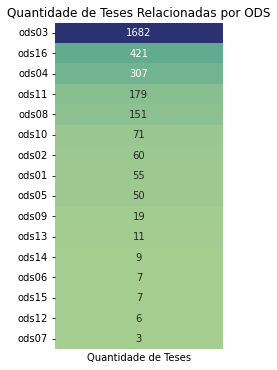

In [361]:
#contagem dos valores True
true_counts = df_pre.iloc[:, 17:].sum(axis=0)

true_counts_df = true_counts.to_frame()

#valores da contagem para o tipo de dado float
true_counts_df[0] = true_counts_df[0].astype(float)

#ordenando o DataFrame pela contagem de valores True
true_counts_df_sorted = true_counts_df.sort_values(by=0, ascending=False)

#mapa de calor
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(true_counts_df_sorted, annot=True, cmap='crest', fmt='.0f', cbar=False)
heatmap.set_xticks([])
plt.title('Quantidade de Teses Relacionadas por ODS')
plt.xlabel('Quantidade de Teses')
plt.show()

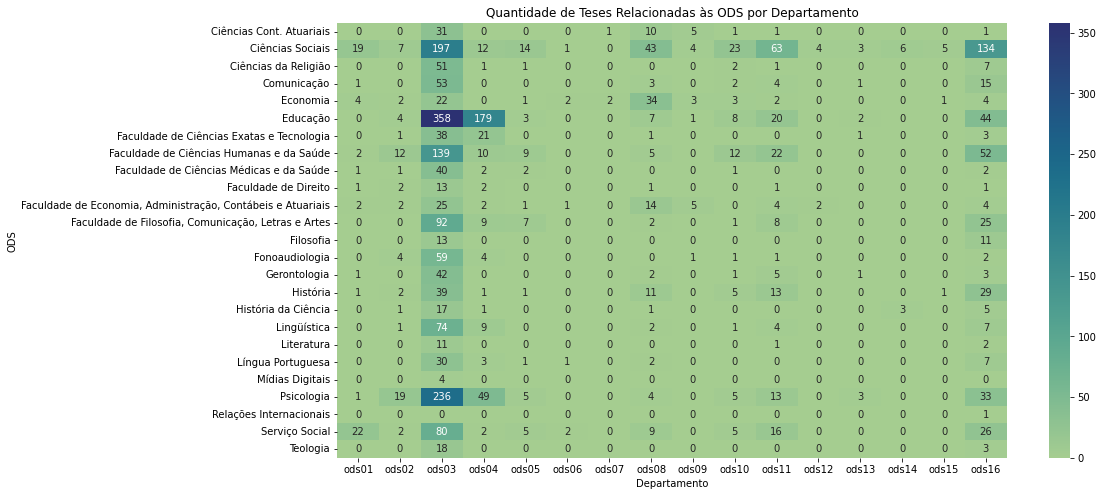

In [360]:
#obtendo as colunas ODS do DataFrame
ods_columns = [col for col in df_pre.columns if col.startswith('ods')]

#calculando a contagem de valores True nas colunas ODS para cada departamento
ods_dept_counts = df_pre.groupby('departamento')[ods_columns].sum()

# Criando o mapa de calor
plt.figure(figsize=(15, 8))
sns.heatmap(ods_dept_counts, cmap='crest', annot=True, fmt='.0f')
plt.title('Quantidade de Teses Relacionadas às ODS por Departamento')
plt.xlabel('Departamento')
plt.ylabel('ODS')
plt.show()

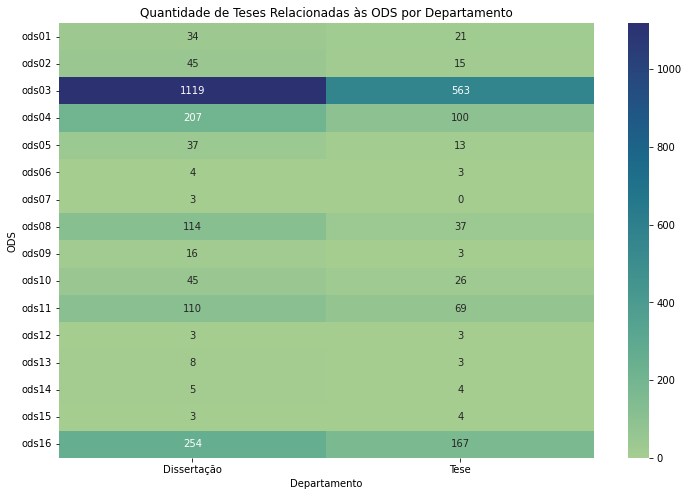

In [359]:
ods_columns = [col for col in df_pre.columns if col.startswith('ods')]

ods_dept_counts = df_pre.groupby('tipo')[ods_columns].sum()

plt.figure(figsize=(12, 8))
sns.heatmap(ods_dept_counts.T, cmap='crest', annot=True, fmt='.0f')
plt.title('Quantidade de Teses Relacionadas às ODS por Departamento')
plt.xlabel('Departamento')
plt.ylabel('ODS')
plt.show()